# importing libraries

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

# Pre Processing

In [6]:
# Loading the dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
# CNN expects 4D inputs :(samples, height, width, channels)

x_train = x_train.reshape(-1, 28,28, 1).astype('float32')/255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')/255.0

In [8]:
# One hote-encoding the labels

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# This converts labels like 3 into [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] —
# which helps the model learn better during training.


Once we have done this much now our data is ready to be fed into the model. Next, we will create a CNN model.

# Building CNN architecture

In [10]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  #10 classes for digits 0-9
])

# before training we need to compile the model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Train the CNN model

In [11]:
history = model.fit(
    x_train, y_train,
    epochs = 5,
    batch_size = 128,
    validation_split = 0.1,
    verbose = 1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8631 - loss: 0.4774 - val_accuracy: 0.9757 - val_loss: 0.0788
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9788 - loss: 0.0673 - val_accuracy: 0.9858 - val_loss: 0.0519
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9858 - loss: 0.0453 - val_accuracy: 0.9897 - val_loss: 0.0395
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9890 - loss: 0.0343 - val_accuracy: 0.9917 - val_loss: 0.0325
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9919 - loss: 0.0239 - val_accuracy: 0.9902 - val_loss: 0.0355


In [12]:
# Evaluating on test data

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy :.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0427
Test accuracy: 0.9887


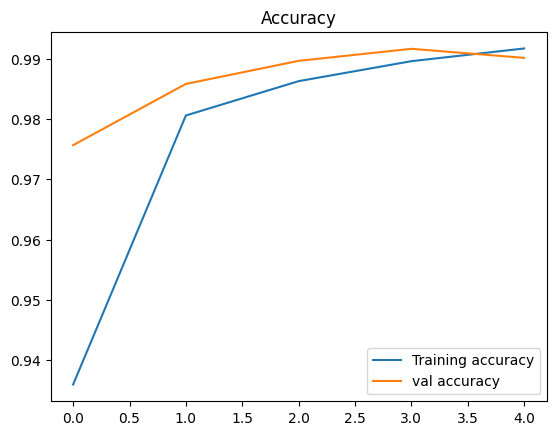

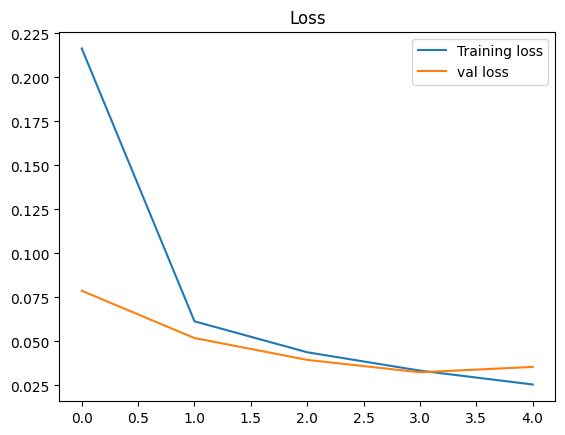

In [14]:
# Optional: Visualizing training progress

import matplotlib.pyplot as plt

# accuracy 
plt.plot(history.history['accuracy'],label= 'Training accuracy')
plt.plot(history.history['val_accuracy'], label= 'val accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# loss
plt.plot(history.history['loss'],label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.title('Loss')
plt.show()

# Lets save our model now 

In [15]:
model.save("mnist_cnn_model.h5")

In [16]:
# Converting to tflite model for mobile and embedded devices

model = tf.keras.models.load_model("mnist_cnn_model.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# save the model
with open("mnist_cnn_model.h5.tflite","wb")as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\RAHUL\AppData\Local\Temp\tmpoygbvtoo\assets


INFO:tensorflow:Assets written to: C:\Users\RAHUL\AppData\Local\Temp\tmpoygbvtoo\assets


Saved artifact at 'C:\Users\RAHUL\AppData\Local\Temp\tmpoygbvtoo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2182537793552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2182537795280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2182537793360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2182537796624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2182537796432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2182537797392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2182537797200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2182537798160: TensorSpec(shape=(), dtype=tf.resource, name=None)
